# Titanic data
### getting started with kaggle

In [2]:
#load data
import pandas as pd

data_dir = 'data/'

data = pd.read_csv(data_dir + 'train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(data.shape)
print(data.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Pclass** : ticket class <br>
**SibSp** : # sibling or spouse aboard <br>
**Parch** : # parents or children aboard <br>
**Embark** : Port

In [9]:
# check the cabin data null values
data[(data.Pclass == 3) & (~data.Cabin.isnull())].shape

(12, 12)

In [14]:
# check which columns contain nan values
def findNaNCol(data):
    nancols = []
    for column in data.columns:
        if data[column].isnull().any():
            nancols.append(column)
    return nancols

nancols = findNaNCol(data)
nancols

['Age', 'Cabin', 'Embarked']

In [16]:
# check if test data also contains same columns
test_data = pd.read_csv(data_dir + 'test.csv')
findNaNCol(test_data)

['Age', 'Fare', 'Cabin']

### Note:
We need to find ways to impute 'Age' and 'Fare' <br>
I dont think 'Embarked' is at all important <br>
'Cabin' can be converted into categorical (? maybe? need to check)

In [17]:
# if there is any Pclass that has non null values of cabin
print(data.Pclass[data.Cabin.isnull()].unique())

[3 2 1]


In [23]:
print(f'unique_cabin : {data.Cabin.unique().shape}\ntotal_Cabin_nan : {sum(data.Cabin.isnull())}')

unique_cabin : (148,)
total_Cabin_nan : 687


### Note2:
After imputing 'Age' and 'Fare', the list of explanatory variables becomes <br>
{id, Pclass, sex, age, sibsp, parch, fare, cabin}

using sibsp and parch can be tricky, maybe i need to form separate model for those, to provide probability of surviving, when you have extra family member

# Imputing age

In [10]:
data[data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


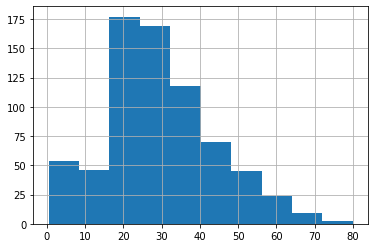

In [8]:
data.Age.hist()

### Note3:
I think number of siblings or parents/children can defintely tell something about the age group of a person. The remaining variables that make a little to no sense are {Pclass, sex, Fare}